In [375]:
import numpy as np
import matplotlib.pyplot as plt

In [376]:
def gen_data(datapoints, standard_error = 0.3):
    X_vals = np.linspace(0,1,datapoints)
    Y_vals = np.sin(2*np.pi*X_vals)+standard_error*np.random.normal(0,1,datapoints)
    return X_vals, Y_vals

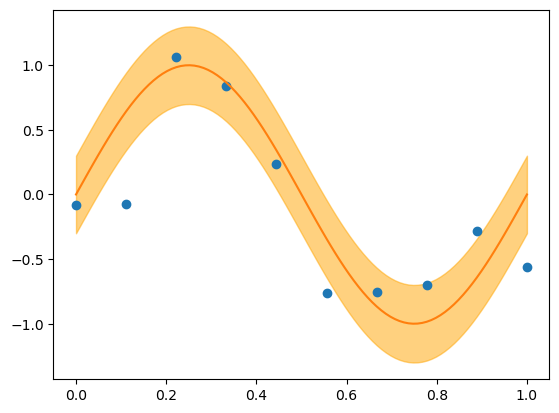

In [381]:
standard_error = 0.3
X_vals, Y_vals = gen_data(10, standard_error)
X_complete = np.linspace(0,1,100)
Y_complete = np.sin(2*np.pi*X_complete)

plt.plot(X_vals,Y_vals,'o')
plt.plot(X_complete,np.sin(2*np.pi*X_complete))
plt.fill_between(X_complete, Y_complete - standard_error, Y_complete + standard_error, color='orange', alpha=0.5, label='Standard Error')



In [378]:
def gen_design_mat(X_vals, degree):
    design_mat = np.zeros((len(X_vals),degree+1))
    for i in range(degree+1):
        design_mat[:,i] = X_vals**i
    return design_mat

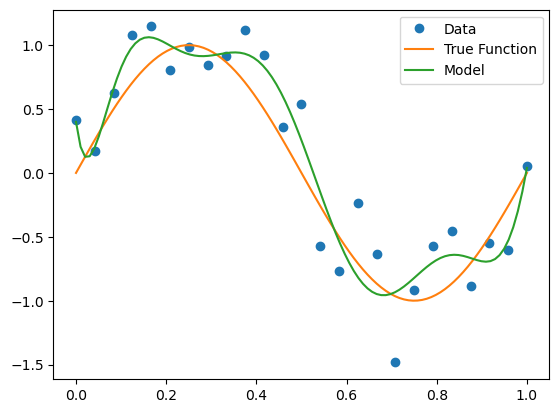

In [406]:
degree = 9
X = gen_design_mat(X_vals, degree)

def calc_theta(X, Y_vals, lambda_val=0):
    lambda_eye = lambda_val*np.eye(X.shape[1])
    #lambda_eye[0,0] = 0 # I tried to remove the bias term from the regularization, it did nothing
    L = np.linalg.cholesky(X.T @ X + lambda_eye)

    L_inv = np.linalg.inv(L)
    A_inv = L_inv.T @ L_inv    
    theta = A_inv@ X.T @ Y_vals
    return theta

plt.plot(X_vals,Y_vals,'o')
plt.plot(X_complete,np.sin(2*np.pi*X_complete))
theta = calc_theta(X,Y_vals, 0)
plt.plot(X_complete,gen_design_mat(X_complete,degree) @ theta)
plt.legend(['Data','True Function','Model'])
#plt.axis('off')

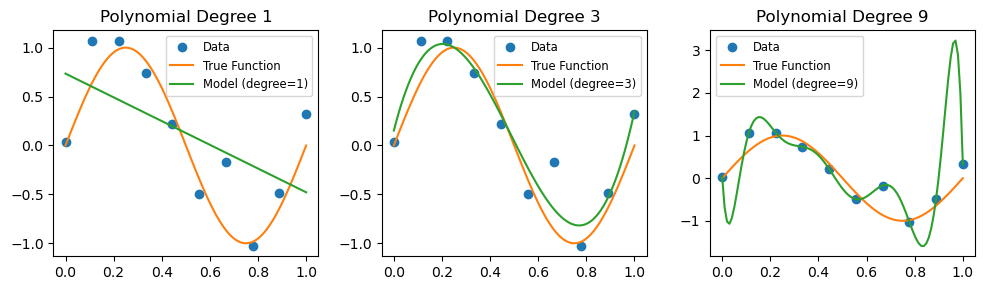

In [340]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming gen_design_mat and other necessary functions are defined elsewhere in your code

# Example data (replace with your actual data)

degrees = [1, 3, 9]

fig, axs = plt.subplots(1, 3, figsize=(10, 3))

for i, degree in enumerate(degrees):
    X = gen_design_mat(X_vals, degree)
    theta = calc_theta(X, Y_vals, 0)
    
    axs[i].plot(X_vals, Y_vals, 'o')
    axs[i].plot(X_complete, np.sin(2 * np.pi * X_complete))
    axs[i].plot(X_complete, gen_design_mat(X_complete, degree) @ theta)
    axs[i].legend(['Data', 'True Function', f'Model (degree={degree})'], fontsize='small')
    axs[i].set_title(f'Polynomial Degree {degree}')

plt.tight_layout()
plt.show()

In [341]:
degrees = np.linspace(1, 10, 10, dtype=int)

losses = []

for i, degree in enumerate(degrees):
    t_losses = []
    for b in range(100):
        X_vals, Y_vals = gen_data(10, standard_error)
        X = gen_design_mat(X_vals, degree)
        X_c = gen_design_mat(X_complete, degree)
        theta = calc_theta(X, Y_vals, 0)
        t_losses.append(np.mean((Y_complete - X_c @ theta) ** 2))
    # plt.plot(X_complete, X_c @ theta)
    # plt.plot(X_complete, Y_complete)
    # plt.title(t_losses[-1])
    # plt.show()
    losses.append(np.mean(t_losses))



[ 1  2  3  4  5  6  7  8  9 10]


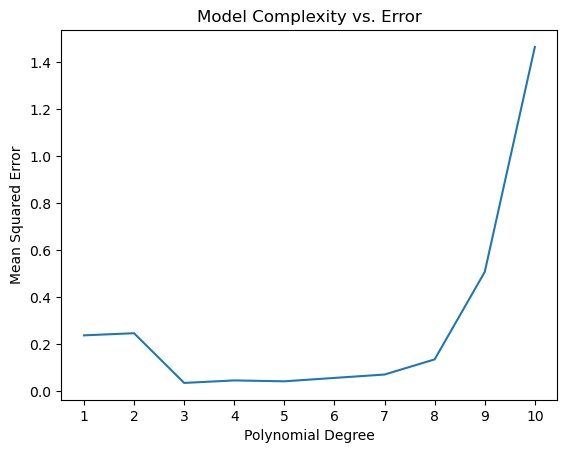

In [342]:
plt.plot(degrees, losses)
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Model Complexity vs. Error')
print(degrees)
from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))




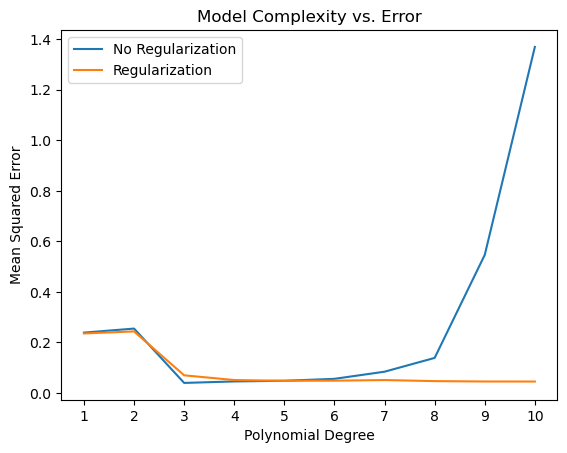

In [343]:
degrees = np.linspace(1, 10, 10, dtype=int)

losses = []

for i, degree in enumerate(degrees):
    t_losses = []
    for b in range(100):
        X_vals, Y_vals = gen_data(10, standard_error)
        X = gen_design_mat(X_vals, degree)
        X_c = gen_design_mat(X_complete, degree)
        theta = calc_theta(X, Y_vals, 0)
        t_losses.append(np.mean((Y_complete - X_c @ theta) ** 2))
    # plt.plot(X_complete, X_c @ theta)
    # plt.plot(X_complete, Y_complete)
    # plt.title(t_losses[-1])
    # plt.show()
    losses.append(np.mean(t_losses))

reg_losses = []

for i, degree in enumerate(degrees):
    t_losses = []
    for b in range(100):
        X_vals, Y_vals = gen_data(10, standard_error)
        X = gen_design_mat(X_vals, degree)
        X_c = gen_design_mat(X_complete, degree)
        theta = calc_theta(X, Y_vals, 1/1000)
        t_losses.append(np.mean((Y_complete - X_c @ theta) ** 2))
    # plt.plot(X_complete, X_c @ theta)
    # plt.plot(X_complete, Y_complete)
    # plt.title(t_losses[-1])
    # plt.show()
    reg_losses.append(np.mean(t_losses))

plt.plot(degrees, losses)
plt.plot(degrees, reg_losses)
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.title('Model Complexity vs. Error')
plt.legend(['No Regularization', 'Regularization'])
from matplotlib.ticker import MaxNLocator
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))



In [344]:
print(theta) # just to show that the coefficients are larger than bishops example

[  0.21268154   5.55642129 -10.96878889  -3.17425933   2.19359946
   3.6059046    2.9015823    1.50803486   0.16584573  -0.82700795
  -1.40193214]


In [345]:
import sympy as sp
# This is just to show the matrices

lambda_eye = np.exp(-18) * np.eye(X.shape[1])
X = sp.Matrix(X)
Y_vals = sp.Matrix(Y_vals)
lambda_eye = sp.Matrix(lambda_eye)

def print_matrix(matrix, title):
    print(f"{title}:\n")
    sp.pretty_print(matrix.evalf(2))
    print("\n")

print_matrix(X, 'Matrix X')

Matrix X:

⎡1.0   0      0      0        0        0        0        0        0        0   ↪
⎢                                                                              ↪
⎢1.0  0.11  0.012  0.0014  0.00015  1.7e-5   1.9e-6   2.1e-7   2.3e-8   2.6e-9 ↪
⎢                                                                              ↪
⎢1.0  0.22  0.049  0.011   0.0024   0.00054  0.00012  2.7e-5   5.9e-6   1.3e-6 ↪
⎢                                                                              ↪
⎢1.0  0.33  0.11   0.037    0.012   0.0041   0.0014   0.00046  0.00015  5.1e-5 ↪
⎢                                                                              ↪
⎢1.0  0.44   0.2   0.088    0.039    0.017   0.0077   0.0034   0.0015   0.0006 ↪
⎢                                                                              ↪
⎢1.0  0.56  0.31    0.17    0.095    0.053    0.029    0.016   0.0091    0.005 ↪
⎢                                                                              ↪
⎢1.0  0.67  0.44 

In [346]:
# Print Y_vals
print_matrix(Y_vals, 'Matrix Y_vals')

Matrix Y_vals:

⎡0.0026⎤
⎢      ⎥
⎢ 0.73 ⎥
⎢      ⎥
⎢ 1.2  ⎥
⎢      ⎥
⎢ 0.98 ⎥
⎢      ⎥
⎢ 0.16 ⎥
⎢      ⎥
⎢-0.32 ⎥
⎢      ⎥
⎢-0.68 ⎥
⎢      ⎥
⎢-0.85 ⎥
⎢      ⎥
⎢ -1.0 ⎥
⎢      ⎥
⎣-0.22 ⎦




In [347]:
# Print lambda_val * I
print_matrix(lambda_eye, 'Matrix lambda_val * I')

Matrix lambda_val * I:

⎡1.5e-8    0       0       0       0       0       0       0       0       0   ↪
⎢                                                                              ↪
⎢  0     1.5e-8    0       0       0       0       0       0       0       0   ↪
⎢                                                                              ↪
⎢  0       0     1.5e-8    0       0       0       0       0       0       0   ↪
⎢                                                                              ↪
⎢  0       0       0     1.5e-8    0       0       0       0       0       0   ↪
⎢                                                                              ↪
⎢  0       0       0       0     1.5e-8    0       0       0       0       0   ↪
⎢                                                                              ↪
⎢  0       0       0       0       0     1.5e-8    0       0       0       0   ↪
⎢                                                                              ↪
⎢  0

In [348]:
import sympy as sp

# Define symbolic variables
lam, b_k, u_kj, b_j, sigma_j, m, k, j = sp.symbols('lambda b_k u_kj b_j sigma_j m k j')

# Define the inner summation
inner_sum1 = sp.Sum(u_kj * b_j * (sigma_j**2 / (sigma_j**2 + lam)), (j, 1, sp.Symbol('r')))
inner_sum2 = sp.Sum(u_kj**2 * (sigma_j**2 / (sigma_j**2 + lam)), (j, 1, sp.Symbol('r')))

# Define the expression inside the brackets
expression = (b_k - inner_sum1) / (1 - inner_sum2)

# Define the outer summation
C = (1/m) * sp.Sum(sp.Symbol('w_k') * expression**2, (k, 1, m))

# Calculate the derivative
derivative = sp.diff(C, lam)

# Print the result
#print(sp.pretty(derivative))
print(derivative)

Sum(-2*w_k*(b_k - Sum(b_j*sigma_j**2*u_kj/(lambda + sigma_j**2), (j, 1, r)))*Sum(-b_j*sigma_j**2*u_kj/(lambda + sigma_j**2)**2, (j, 1, r))/(1 - Sum(sigma_j**2*u_kj**2/(lambda + sigma_j**2), (j, 1, r)))**2 + 2*w_k*(b_k - Sum(b_j*sigma_j**2*u_kj/(lambda + sigma_j**2), (j, 1, r)))**2*Sum(-sigma_j**2*u_kj**2/(lambda + sigma_j**2)**2, (j, 1, r))/(1 - Sum(sigma_j**2*u_kj**2/(lambda + sigma_j**2), (j, 1, r)))**3, (k, 1, m))/m


In [349]:
# Convert to LaTeX
latex_code = sp.latex(derivative)

# Print the LaTeX code
print(latex_code)

\frac{\sum_{k=1}^{m} \left(- \frac{2 w_{k} \left(b_{k} - \sum_{j=1}^{r} \frac{b_{j} \sigma_{j}^{2} u_{kj}}{\lambda + \sigma_{j}^{2}}\right) \sum_{j=1}^{r} - \frac{b_{j} \sigma_{j}^{2} u_{kj}}{\left(\lambda + \sigma_{j}^{2}\right)^{2}}}{\left(1 - \sum_{j=1}^{r} \frac{\sigma_{j}^{2} u_{kj}^{2}}{\lambda + \sigma_{j}^{2}}\right)^{2}} + \frac{2 w_{k} \left(\left(b_{k} - \sum_{j=1}^{r} \frac{b_{j} \sigma_{j}^{2} u_{kj}}{\lambda + \sigma_{j}^{2}}\right)^{2}\right) \sum_{j=1}^{r} - \frac{\sigma_{j}^{2} u_{kj}^{2}}{\left(\lambda + \sigma_{j}^{2}\right)^{2}}}{\left(1 - \sum_{j=1}^{r} \frac{\sigma_{j}^{2} u_{kj}^{2}}{\lambda + \sigma_{j}^{2}}\right)^{3}}\right)}{m}


In [350]:
# Convert to LaTeX
latex_code = sp.latex(C)

# Print the LaTeX code
print(latex_code)

\frac{\sum_{k=1}^{m} \frac{w_{k} \left(b_{k} - \sum_{j=1}^{r} \frac{b_{j} \sigma_{j}^{2} u_{kj}}{\lambda + \sigma_{j}^{2}}\right)^{2}}{\left(1 - \sum_{j=1}^{r} \frac{\sigma_{j}^{2} u_{kj}^{2}}{\lambda + \sigma_{j}^{2}}\right)^{2}}}{m}


In [351]:
solutions = sp.solveset(derivative, lam)
print(solutions)

Union(ConditionSet(lambda, Eq(-b_k + Sum(b_j*sigma_j**2*u_kj/(lambda + sigma_j**2), (j, 1, r)), 0), Complexes), ConditionSet(lambda, Eq(b_k*Sum(-sigma_j**2*u_kj**2/(lambda**2 + 2*lambda*sigma_j**2 + sigma_j**4), (j, 1, r)) + Sum(sigma_j**2*u_kj**2/(lambda + sigma_j**2), (j, 1, r))*Sum(-b_j*sigma_j**2*u_kj/(lambda**2 + 2*lambda*sigma_j**2 + sigma_j**4), (j, 1, r)) - Sum(-sigma_j**2*u_kj**2/(lambda**2 + 2*lambda*sigma_j**2 + sigma_j**4), (j, 1, r))*Sum(b_j*sigma_j**2*u_kj/(lambda + sigma_j**2), (j, 1, r)) - Sum(-b_j*sigma_j**2*u_kj/(lambda**2 + 2*lambda*sigma_j**2 + sigma_j**4), (j, 1, r)), 0), Complexes))


In [352]:
import sympy as sp

# ... (define the symbols and the derivative expression as before) ...

# Set the derivative equal to zero
equation = sp.Eq(derivative, 0)

# Now you can use solveset or nsolve to find solutions for lambda
solutions = sp.solveset(equation, lam)
# or
#numerical_solution = sp.nsolve(equation, lam, 0.1)

In [353]:
# Convert to LaTeX
latex_code = sp.latex(equation)

# Print the LaTeX code
print(latex_code)

\frac{\sum_{k=1}^{m} \left(- \frac{2 w_{k} \left(b_{k} - \sum_{j=1}^{r} \frac{b_{j} \sigma_{j}^{2} u_{kj}}{\lambda + \sigma_{j}^{2}}\right) \sum_{j=1}^{r} - \frac{b_{j} \sigma_{j}^{2} u_{kj}}{\left(\lambda + \sigma_{j}^{2}\right)^{2}}}{\left(1 - \sum_{j=1}^{r} \frac{\sigma_{j}^{2} u_{kj}^{2}}{\lambda + \sigma_{j}^{2}}\right)^{2}} + \frac{2 w_{k} \left(\left(b_{k} - \sum_{j=1}^{r} \frac{b_{j} \sigma_{j}^{2} u_{kj}}{\lambda + \sigma_{j}^{2}}\right)^{2}\right) \sum_{j=1}^{r} - \frac{\sigma_{j}^{2} u_{kj}^{2}}{\left(\lambda + \sigma_{j}^{2}\right)^{2}}}{\left(1 - \sum_{j=1}^{r} \frac{\sigma_{j}^{2} u_{kj}^{2}}{\lambda + \sigma_{j}^{2}}\right)^{3}}\right)}{m} = 0


In [354]:
# Convert to LaTeX
latex_code = sp.latex(solutions)

# Print the LaTeX code
print(latex_code)

\left\{\lambda\; \middle|\; \lambda \in \mathbb{C} \wedge - b_{k} + \sum_{j=1}^{r} \frac{b_{j} \sigma_{j}^{2} u_{kj}}{\lambda + \sigma_{j}^{2}} = 0 \right\} \cup \left\{\lambda\; \middle|\; \lambda \in \mathbb{C} \wedge b_{k} \sum_{j=1}^{r} - \frac{\sigma_{j}^{2} u_{kj}^{2}}{\lambda^{2} + 2 \lambda \sigma_{j}^{2} + \sigma_{j}^{4}} + \left(\sum_{j=1}^{r} \frac{\sigma_{j}^{2} u_{kj}^{2}}{\lambda + \sigma_{j}^{2}}\right) \sum_{j=1}^{r} - \frac{b_{j} \sigma_{j}^{2} u_{kj}}{\lambda^{2} + 2 \lambda \sigma_{j}^{2} + \sigma_{j}^{4}} - \left(\sum_{j=1}^{r} - \frac{\sigma_{j}^{2} u_{kj}^{2}}{\lambda^{2} + 2 \lambda \sigma_{j}^{2} + \sigma_{j}^{4}}\right) \sum_{j=1}^{r} \frac{b_{j} \sigma_{j}^{2} u_{kj}}{\lambda + \sigma_{j}^{2}} - \sum_{j=1}^{r} - \frac{b_{j} \sigma_{j}^{2} u_{kj}}{\lambda^{2} + 2 \lambda \sigma_{j}^{2} + \sigma_{j}^{4}} = 0 \right\}


In [355]:
# Define a symbolic matrix X (with dimensions 2x2 in this example)
X = sp.MatrixSymbol('X', 2, 2)

# Perform operations with X
Y = sp.Matrix([[1, 2], [3, 4]])
result = X * Y  # Matrix multiplication

# Calculate inverse, determinant, etc.
X_inv = X.inv()
determinant = X.det()

# Print the results
print(result)
print(X_inv)
print(determinant)

X*Matrix([
[1, 2],
[3, 4]])
X**(-1)
Determinant(X)


In [356]:
from scipy.optimize import minimize

In [357]:
import numpy as np
from scipy.linalg import svd, qr, solve

def solve_normal_equation_with_reg(X, y, method="svd", lambda_=0.1):
    n, p = X.shape

    if method == "svd":
        U, s, Vh = svd(X)
        s = np.diag(s)  # Convert singular values to diagonal matrix
        s_reg = s + lambda_ * np.eye(p) 
        #s_reg = np.concatenate([s_reg, np.array([np.zeros((p))])], axis=0)  # Pad s with zeros
        X_pinv = Vh.T @ np.linalg.pinv(s_reg).T @ U.T
        coefficients = X_pinv @ y

    elif method == "qr":
        Q, R = qr(X)
        # Add regularization to the R matrix
        print(R.shape)
        print(lambda_ * np.eye(p))
        R_reg = R + lambda_ * np.eye(p)  
        coefficients = solve(R_reg, Q.T @ y)

    elif method == "invert":
        # Add regularization to X^T X
        XTX_reg = X.T @ X + lambda_ * np.eye(p)  
        coefficients = solve(XTX_reg, X.T @ y)  # Use solve for stability

    else:
        raise ValueError("Invalid method. Choose from 'svd', 'qr', or 'invert'.")

    return coefficients


In [358]:
def SVD_calc_theta(X, y, lamb):
  
  U, s, Vh = np.linalg.svd(X)
  s = np.diag(s)  # Convert singular values to diagonal matrix

  r = np.linalg.matrix_rank(s)  # Determine the rank of s
  w = np.zeros_like(Vh[0])  # Initialize w with appropriate size
  for i in range(r):
    w += s[i,i]*(U[:, i].T @ y) / (s[i,i]**2+lamb )* Vh[i]
  return w

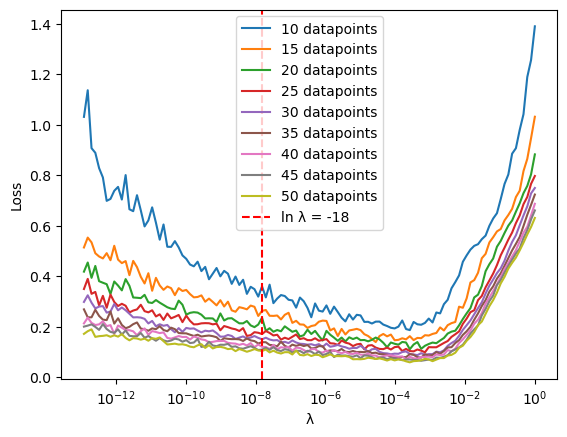

In [399]:
best_losses = []
best_lambdas = []
standard_error = 0.3
for datapoints in range(10, 51, 5):
    lambdas = [np.exp(-i/4) for i in range(120)]
    losses = []
    for lamb in lambdas:
        loss = 0
        for i in range(100):
            X_vals, Y_vals = gen_data(datapoints, standard_error)
            X = gen_design_mat(X_vals, datapoints-1)
            theta = SVD_calc_theta(X, Y_vals, lamb)
            loss += np.mean((Y_complete - gen_design_mat(X_complete, datapoints-1) @ theta) ** 2) #move this out of the loop
        losses.append(loss/20)
    best_losses.append(min(losses))
    best_lambdas.append(lambdas[losses.index(min(losses))])
    plot = plt.semilogx(lambdas, losses)
    x_value = np.exp(-18) 
plt.axvline(x=x_value, color='r', linestyle='--', label=f'x = {x_value:.2e}')
plt.legend(['10 datapoints', '15 datapoints', '20 datapoints', '25 datapoints', '30 datapoints', '35 datapoints', '40 datapoints', '45 datapoints', '50 datapoints', 'ln λ = -18'])
plt.xlabel('λ')
plt.ylabel('Loss')
plt.show()


In [360]:
X_vals, Y_vals = gen_data(10, standard_error)
X = gen_design_mat(X_vals, 9)

def calc_C(lamb, X, Y_vals):
    sum = 0
    for k in range(X.shape[0]):
        Xt = np.concatenate((X[:k, :], X[k+1:, :]), axis=0)
        yt = np.concatenate((Y_vals[:k], Y_vals[k+1:]), axis=0)
        xk = X[k, :]
        yk = Y_vals[k]
        wk = solve_normal_equation_with_reg(Xt, yt, method="svd", lambda_=lamb)
        wk = np.linalg.inv(Xt.T @ Xt + lamb * np.eye(Xt.shape[1])) @ Xt.T @ yt
        sum += (xk @ wk - yk)**2

    return sum / X.shape[0]

result = minimize(calc_C, 0, args=(X, Y_vals))
        
print(result.x/np.exp(-18))

ValueError: operands could not be broadcast together with shapes (9,9) (10,10) 

In [244]:

lambdas = [np.exp(-i/4) for i in range(120)]
losses = []
for lamb in lambdas:
    loss = 0
    for i in range(40):
        X_vals, Y_vals = gen_data(100, standard_error)
        X = gen_design_mat(X_vals, 99)
        theta = calc_theta(X,Y_vals, lamb)
        loss += np.mean((Y_complete - gen_design_mat(X_complete,99) @ theta) ** 2)
    losses.append(loss/20)



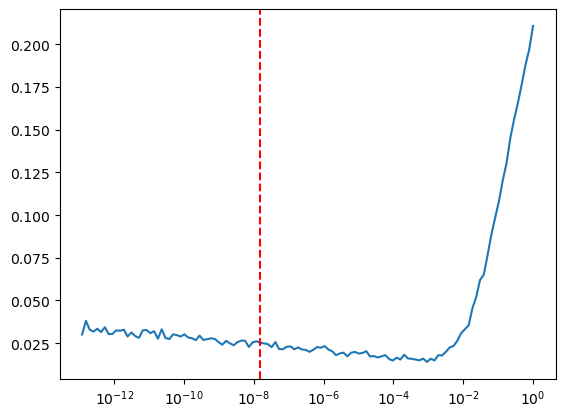

In [245]:
plot = plt.semilogx(lambdas, losses)
x_value = np.exp(-18) 
plt.axvline(x=x_value, color='r', linestyle='--', label=f'x = {x_value:.2e}')


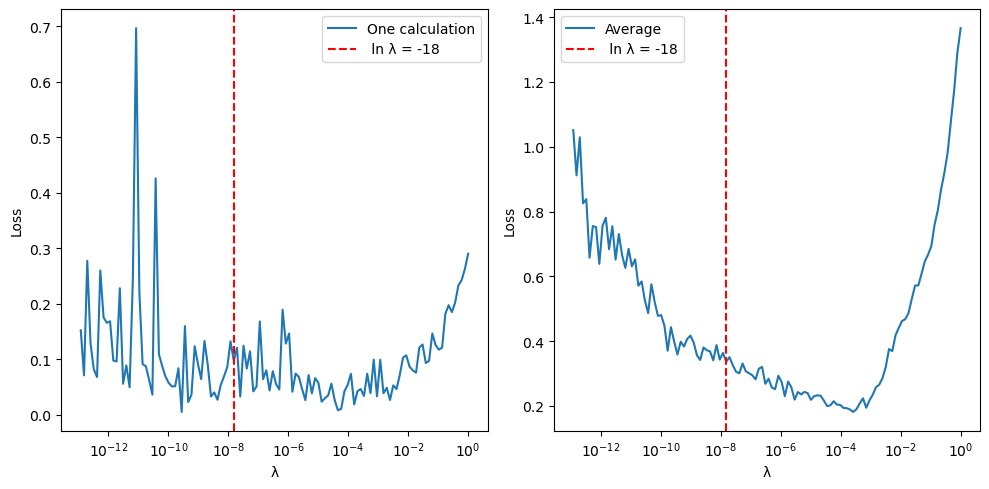

In [308]:

lambdas = [np.exp(-i/4) for i in range(120)]
losses = []
one_losses = [] 
for lamb in lambdas:
    loss = 0
    for i in range(100):
        X_vals, Y_vals = gen_data(10, standard_error)
        X = gen_design_mat(X_vals, 9)
        theta = calc_theta(X,Y_vals, lamb)
        loss += np.mean((Y_complete - gen_design_mat(X_complete,9) @ theta) ** 2)
    losses.append(loss/20)

    X_vals, Y_vals = gen_data(10, standard_error)
    X = gen_design_mat(X_vals, 9)
    theta = calc_theta(X,Y_vals, lamb)
    one_losses.append(np.mean((Y_complete - gen_design_mat(X_complete,9) @ theta) ** 2))

x_value = np.exp(-18) 

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].semilogx(lambdas, one_losses)
axs[0].axvline(x=x_value, color='r', linestyle='--', label=f'x = {x_value:.2e}')
axs[0].set_xlabel('λ')
axs[0].set_ylabel('Loss')
axs[0].legend(['One calculation', ' ln λ = -18'])

axs[1].semilogx(lambdas, losses)
axs[1].axvline(x=x_value, color='r', linestyle='--', label=f'x = {x_value:.2e}')
axs[1].set_xlabel('λ')
axs[1].set_ylabel('Loss')
axs[1].legend(['Average', ' ln λ = -18'])
plt.tight_layout()




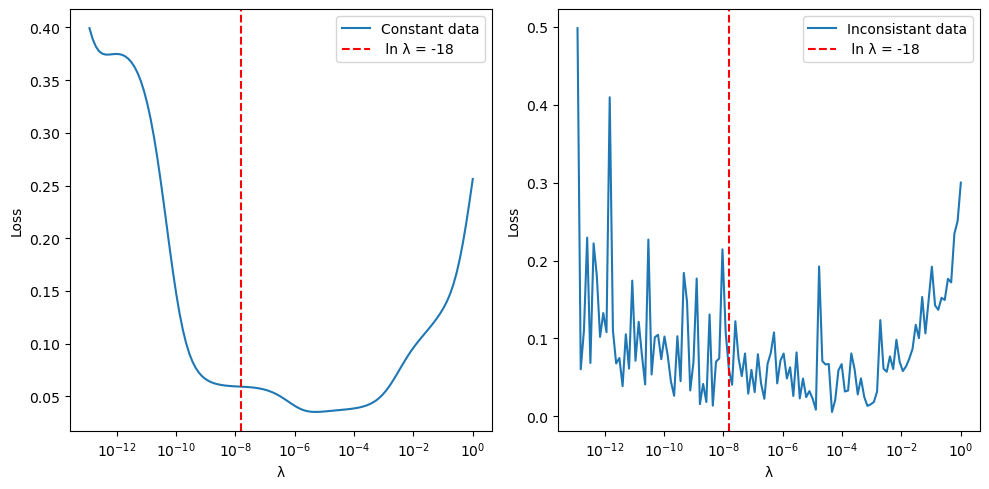

In [313]:

lambdas = [np.exp(-i/4) for i in range(120)]
two_losses = []
one_losses = [] 
X_comp_mat = gen_design_mat(X_complete,9)

X_vals_2, Y_vals_2 = gen_data(10, standard_error)
X_2 = gen_design_mat(X_vals, 9)

for lamb in lambdas:

    X_vals, Y_vals = gen_data(10, standard_error)
    X = gen_design_mat(X_vals, 9)
    theta = calc_theta(X,Y_vals, lamb)
    theta_2 = calc_theta(X_2,Y_vals_2, lamb)
    one_losses.append(np.mean((Y_complete - X_comp_mat @ theta) ** 2))
    two_losses.append(np.mean((Y_complete - X_comp_mat @ theta_2) ** 2))

x_value = np.exp(-18) 

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].semilogx(lambdas, two_losses)
axs[0].axvline(x=x_value, color='r', linestyle='--', label=f'x = {x_value:.2e}')
axs[0].set_xlabel('λ')
axs[0].set_ylabel('Loss')
axs[0].legend(['Constant data', ' ln λ = -18'])

axs[1].semilogx(lambdas, one_losses)
axs[1].axvline(x=x_value, color='r', linestyle='--', label=f'x = {x_value:.2e}')
axs[1].set_xlabel('λ')
axs[1].set_ylabel('Loss')
axs[1].legend(['Inconsistant data', ' ln λ = -18'])
plt.tight_layout()




Text(0, 0.5, 'Loss')

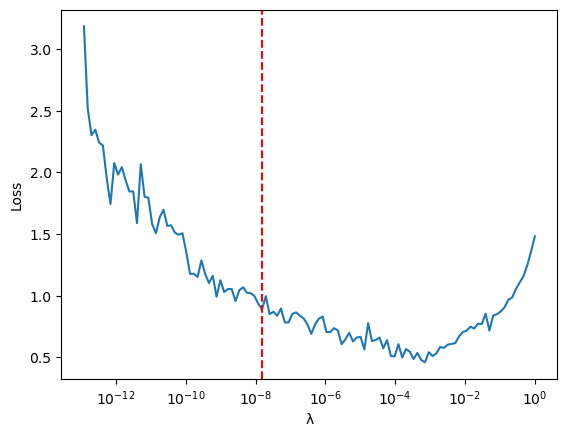

In [260]:
lambdas = [np.exp(-i/4) for i in range(120)]
losses = []
for lamb in lambdas:
    loss = 0
    for i in range(100):
        X_vals, Y_vals = gen_data(10, 0.5)
        X = gen_design_mat(X_vals, 9)
        theta = calc_theta(X,Y_vals, lamb)
        loss += np.mean((Y_complete - gen_design_mat(X_complete,9) @ theta) ** 2)
    losses.append(loss/20)

plot = plt.semilogx(lambdas, losses)
x_value = np.exp(-18) 
plt.axvline(x=x_value, color='r', linestyle='--', label=f'x = {x_value:.2e}')
plt.xlabel('λ')
plt.ylabel('Loss')

In [297]:
def calc_theta(X, Y_vals, lambda_val=0):
    lambda_eye = lambda_val*np.eye(X.shape[1])
    #lambda_eye[0,0] = 0 # I tried to remove the bias term from the regularization, it did nothing
    theta = np.linalg.inv(X.T @ X+lambda_eye) @ X.T @ Y_vals
    return theta

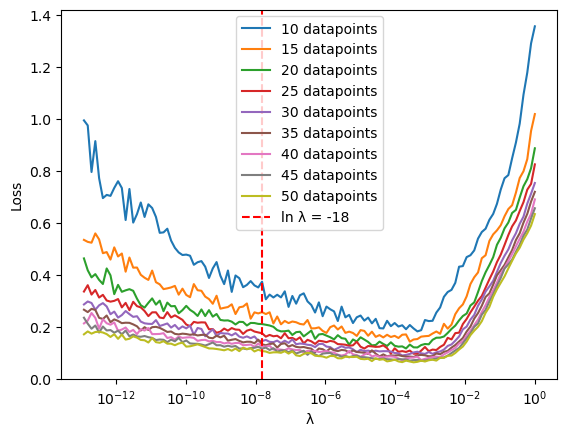

In [407]:
best_losses = []
best_lambdas = []
standard_error = 0.3
for datapoints in range(10, 51, 5):
    lambdas = [np.exp(-i/4) for i in range(120)]
    losses = []
    for lamb in lambdas:
        loss = 0
        for i in range(100):
            X_vals, Y_vals = gen_data(datapoints, standard_error)
            X = gen_design_mat(X_vals, datapoints-1)
            theta = calc_theta(X,Y_vals, lamb)
            loss += np.mean((Y_complete - gen_design_mat(X_complete, datapoints-1) @ theta) ** 2)
        losses.append(loss/20)
    best_losses.append(min(losses))
    best_lambdas.append(lambdas[losses.index(min(losses))])
    plot = plt.semilogx(lambdas, losses)
    x_value = np.exp(-18) 
plt.axvline(x=x_value, color='r', linestyle='--', label=f'x = {x_value:.2e}')
plt.legend(['10 datapoints', '15 datapoints', '20 datapoints', '25 datapoints', '30 datapoints', '35 datapoints', '40 datapoints', '45 datapoints', '50 datapoints', 'ln λ = -18'])
plt.xlabel('λ')
plt.ylabel('Loss')
plt.show()


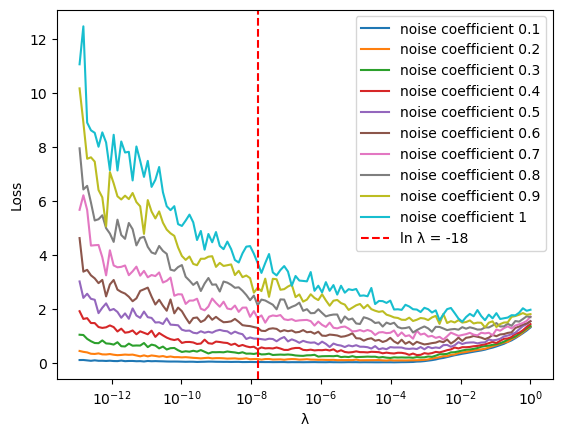

In [370]:
best_losses = []
best_lambdas = []
datapoints = 10
standard_errors = np.linspace(0.1, 1, 10)
for standard_error in standard_errors:
    lambdas = [np.exp(-i/4) for i in range(120)]
    losses = []
    for lamb in lambdas:
        loss = 0
        for i in range(100):
            X_vals, Y_vals = gen_data(datapoints, standard_error)
            X = gen_design_mat(X_vals, datapoints-1)
            theta = calc_theta(X,Y_vals, lamb)
            loss += np.mean((Y_complete - gen_design_mat(X_complete, datapoints-1) @ theta) ** 2)
        losses.append(loss/20)
    best_losses.append(min(losses))
    best_lambdas.append(lambdas[losses.index(min(losses))])
    plot = plt.semilogx(lambdas, losses)
x_value = np.exp(-18) 
plt.axvline(x=x_value, color='r', linestyle='--', label=f'x = {x_value:.2e}')
plt.legend(['noise coefficient 0.1', 'noise coefficient 0.2', 'noise coefficient 0.3', 'noise coefficient 0.4', 'noise coefficient 0.5', 'noise coefficient 0.6', 'noise coefficient 0.7', 'noise coefficient 0.8', 'noise coefficient 0.9', 'noise coefficient 1', 'ln λ = -18'])
plt.xlabel('λ')
plt.ylabel('Loss')
plt.show()

In [404]:
ply_deg = np.linspace(5, 50, 10, dtype=int)
print(ply_deg)

[ 5 10 15 20 25 30 35 40 45 50]


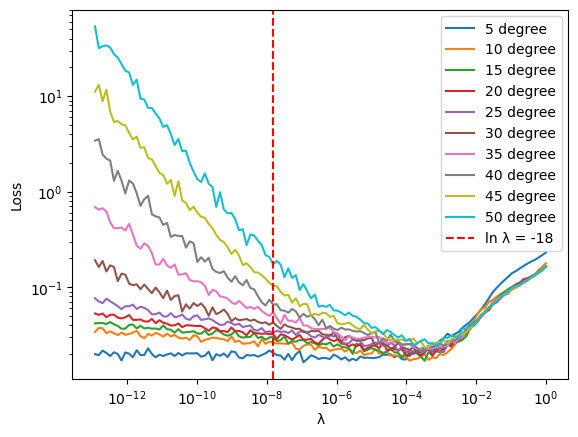

In [408]:
best_losses = []
best_lambdas = []
standard_error = 0.3
datapoints = 25
poly_degs = np.linspace(5, 50, 10, dtype=int)
for poly_deg in poly_degs:
    lambdas = [np.exp(-i/4) for i in range(120)]
    losses = []
    for lamb in lambdas:
        loss = 0
        for i in range(100):
            X_vals, Y_vals = gen_data(datapoints, standard_error)
            X = gen_design_mat(X_vals, poly_deg)
            theta = calc_theta(X,Y_vals, lamb)
            loss += np.mean((Y_complete - gen_design_mat(X_complete, poly_deg) @ theta) ** 2)
        losses.append(loss/100)
    plot = plt.loglog(lambdas, losses)
x_value = np.exp(-18) 
plt.axvline(x=x_value, color='r', linestyle='--', label=f'x = {x_value:.2e}')
plt.legend(['5 degree', '10 degree', '15 degree', '20 degree', '25 degree', '30 degree', '35 degree', '40 degree', '45 degree', '50 degree', 'ln λ = -18'])
plt.xlabel('λ')
plt.ylabel('Loss')
plt.show()


In [316]:
def gen_data(datapoints, standard_error = 0.3, func = np.sin):
    X_vals = np.linspace(0,1,datapoints)
    Y_vals = func(2*np.pi*X_vals)+standard_error*np.random.normal(0,1,datapoints)
    return X_vals, Y_vals

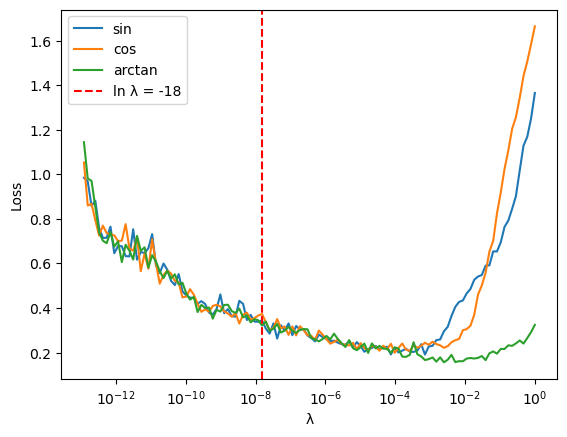

In [329]:
best_losses = []
best_lambdas = []
datapoints = 10
standard_error = 0.3
funcs = [np.sin, np.cos, np.arctan]
for func in funcs:
    lambdas = [np.exp(-i/4) for i in range(120)]
    losses = []
    for lamb in lambdas:
        loss = 0
        for i in range(100):
            X_vals, Y_vals = gen_data(datapoints, standard_error, func=func)
            X = gen_design_mat(X_vals, datapoints-1)
            theta = calc_theta(X,Y_vals, lamb)
            Y_complete = func(2*np.pi*X_complete)
            loss += np.mean((Y_complete - gen_design_mat(X_complete, datapoints-1) @ theta) ** 2)
        losses.append(loss/20)
    best_losses.append(min(losses))
    plot = plt.semilogx(lambdas, losses)
x_value = np.exp(-18) 
plt.axvline(x=x_value, color='r', linestyle='--', label=f'x = {x_value:.2e}')
plt.legend(['sin', 'cos', 'arctan', 'ln λ = -18'])
plt.xlabel('λ')
plt.ylabel('Loss')
plt.show()

In [400]:
import numpy as np

def calculate_C(U, s, b_tilde, w, lambda_):
  """
  Calculates C(lambda) based on the provided formula.

  Args:
    U: Matrix U (m x r) with elements u_{kj}.
    s: Vector of singular values (sigma_j).
    b_tilde: Vector of b_tilde values.
    w: Vector of w values.
    lambda_: Regularization parameter (lambda).

  Returns:
    The calculated value of C(lambda).
  """
  m, r = U.shape  # Get the dimensions of U
  C = 0
  for k in range(m):
    numerator = b_tilde[k] - sum(U[k, j] * b_tilde[j] * (s[j]**2 / (s[j]**2 + lambda_)) for j in range(r))
    denominator = 1 - sum(U[k, j]**2 * (s[j]**2 / (s[j]**2 + lambda_)) for j in range(r))
    C += w[k] * (numerator / denominator)**2
  return C / m

standard_error = 0.3
X_vals, Y_vals = gen_data(10, standard_error)
X = gen_design_mat(X_vals, 9)
U, s, Vh = np.linalg.svd(X)
print(U.shape)
print(s.shape)
print(Vh.shape)
b_tilde = U@Y_vals
v=np.ones_like(b_tilde)
lambdas = [np.exp(-i/4) for i in range(120)]
C_losses = []
for lambda_ in lambdas:
  C_lambda = calculate_C(U, s, b_tilde, v, lambda_)
  C_losses.append(C_lambda)


(10, 10)
(10,)
(10, 10)


In [ ]:
min = minimize(calculate_C, 0, args=(U, s, b_tilde, v, 0.1))

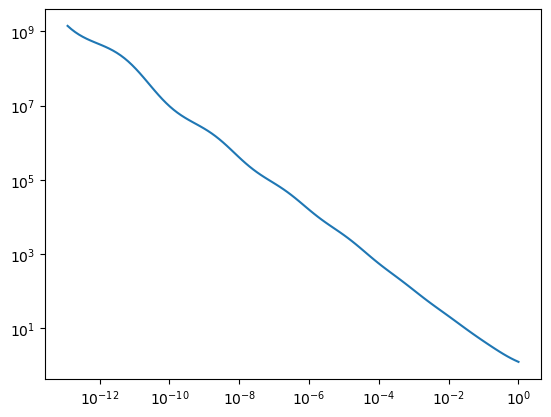

In [401]:
plt.loglog(lambdas, C_losses)

Optimal lambda: 0.9999940391390134
Minimum C(lambda): 0.9411717970670821


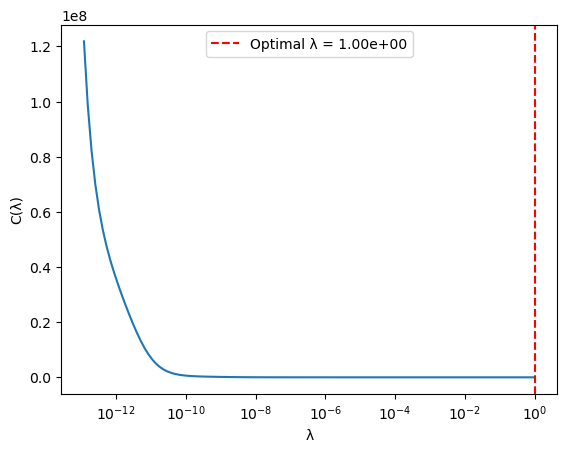

In [402]:
import numpy as np
from scipy.optimize import minimize_scalar

def calculate_C(U, s, b_tilde, w, lambda_):
    """
    Calculates C(lambda) based on the provided formula.

    Args:
        U: Matrix U (m x r) with elements u_{kj}.
        s: Vector of singular values (sigma_j).
        b_tilde: Vector of b_tilde values.
        w: Vector of w values.
        lambda_: Regularization parameter (lambda).

    Returns:
        The calculated value of C(lambda).
    """
    m, r = U.shape  # Get the dimensions of U
    C = 0
    for k in range(m):
        numerator = b_tilde[k] - sum(U[k, j] * b_tilde[j] * (s[j]**2 / (s[j]**2 + lambda_)) for j in range(r))
        denominator = 1 - sum(U[k, j]**2 * (s[j]**2 / (s[j]**2 + lambda_)) for j in range(r))
        C += w[k] * (numerator / denominator)**2
    return C / m

# Generate data and compute SVD
standard_error = 0.3
X_vals, Y_vals = gen_data(10, standard_error)
X = gen_design_mat(X_vals, 9)
U, s, Vh = np.linalg.svd(X)
b_tilde = U @ Y_vals
v = np.ones_like(b_tilde)

# Define the wrapper function for optimization
def objective_function(lambda_):
    return calculate_C(U, s, b_tilde, v, lambda_)

# Use minimize_scalar to find the optimal lambda
result = minimize_scalar(objective_function, bounds=(np.exp(-30), np.exp(0)), method='bounded')

# Extract the optimal lambda
optimal_lambda = result.x
optimal_C = result.fun

print(f"Optimal lambda: {optimal_lambda}")
print(f"Minimum C(lambda): {optimal_C}")

# Plot the C(lambda) values for visualization
lambdas = [np.exp(-i/4) for i in range(120)]
C_losses = [calculate_C(U, s, b_tilde, v, lambda_) for lambda_ in lambdas]

import matplotlib.pyplot as plt
plt.semilogx(lambdas, C_losses)
plt.axvline(x=optimal_lambda, color='r', linestyle='--', label=f'Optimal λ = {optimal_lambda:.2e}')
plt.xlabel('λ')
plt.ylabel('C(λ)')
plt.legend()
plt.show()